## Import Library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Read dataset


In [2]:
# Đọc dữ liệu
df = pd.read_csv("../dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Print first 5 rows to check the data
print(df.head())

# Check data types and null values
print(df.info())

# Convert TotalCharges to numeric, errors (whitespace) will become NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many rows have null values after conversion
print(f"Number of missing values: {df['TotalCharges'].isnull().sum()}")
# Because the number is very small (usually 11 rows), we can drop these rows
df.dropna(inplace=True)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

## Parse dataset


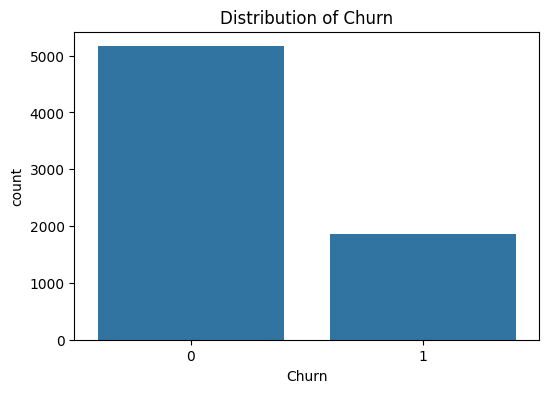

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

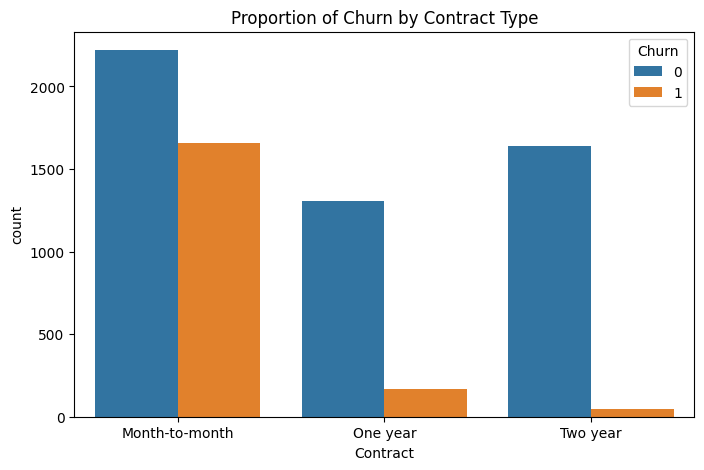

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Proportion of Churn by Contract Type')
plt.show()

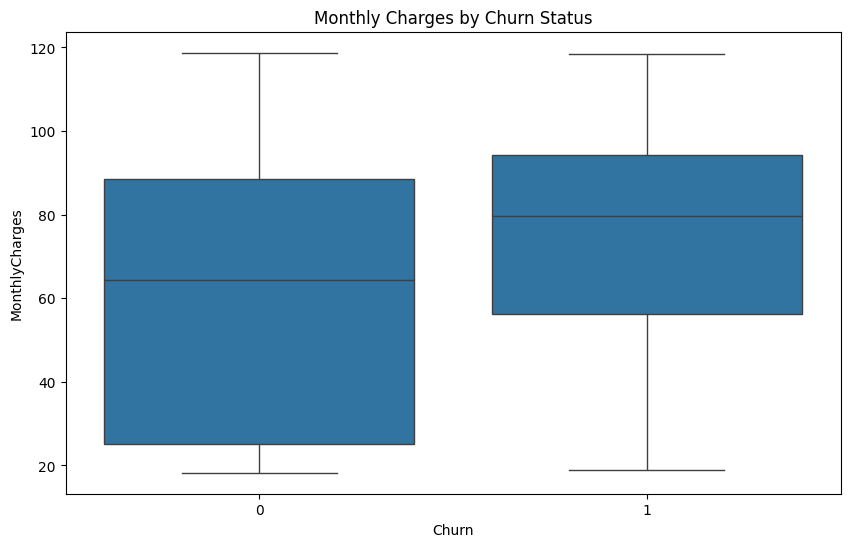

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.show()

## Data Preproccesing


In [ ]:
# Delete customerID column as it is not useful for prediction
df.drop('customerID', axis=1, inplace=True)

In [22]:
# Convert categorical variables to numerical
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No', value=0, inplace=True)

# Convert remaining categorical variables using One-Hot Encoding
# pd.get_dummies will automatically find columns with text and convert them, keeping numeric columns unchanged
df_dummies = pd.get_dummies(df)

# Check the data again
print(df_dummies.head())
print(df_dummies.shape) # See how many columns have increased

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1           29.85         29.85      0           True   
1              0      34           56.95       1889.50      0          False   
2              0       2           53.85        108.15      1          False   
3              0      45           42.30       1840.75      0          False   
4              0       2           70.70        151.65      1           True   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0        False       False         True           True  ...   
1         True        True        False           True  ...   
2         True        True        False           True  ...   
3         True        True        False           True  ...   
4        False        True        False           True  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                False                     True              False   


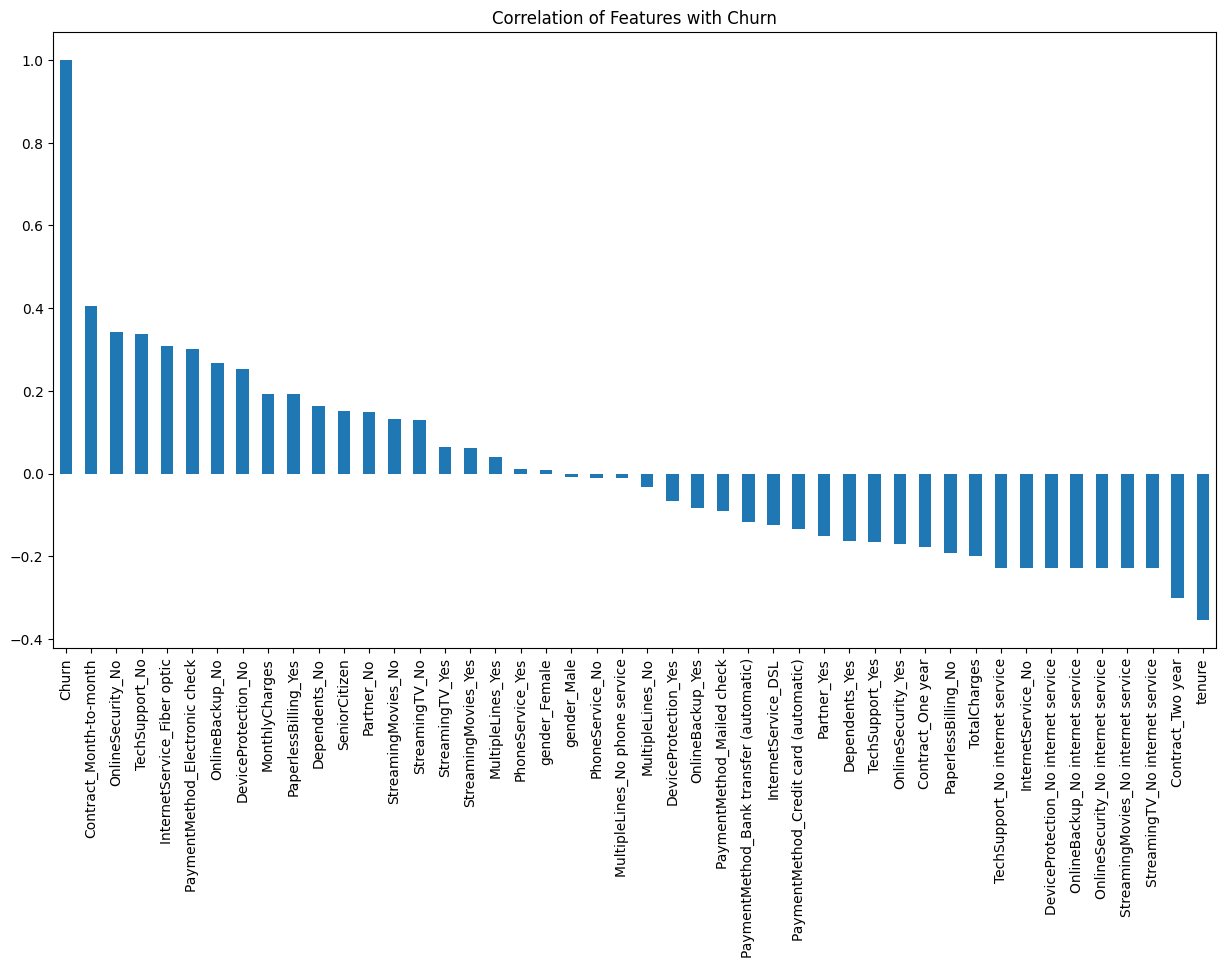

In [23]:
plt.figure(figsize=(15,8))
# Plot correlation of all features with Churn
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.title('Correlation of Features with Churn')
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Columns to be scaled
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()
df_dummies[cols_to_scale] = scaler.fit_transform(df_dummies[cols_to_scale])

# Check again to ensure data is within the range 0-1
print(df_dummies[cols_to_scale].head())

     tenure  MonthlyCharges  TotalCharges
0  0.000000        0.115423      0.001275
1  0.464789        0.385075      0.215867
2  0.014085        0.354229      0.010310
3  0.619718        0.239303      0.210241
4  0.014085        0.521891      0.015330


In [25]:
from sklearn.model_selection import train_test_split

# Parse features and target
X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']

# Split train/test
# stratify=y is extremely important for imbalanced data.
# It ensures the proportion of customers who churn (Yes) and stay (No) in both Train and Test sets is the same.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Train set size: (5625, 45)
Test set size: (1407, 45)


## Training

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Logistic Regression model
log_model = LogisticRegression()

# Train the model on the Train set
log_model.fit(X_train, y_train)

# Predict on the Test set
y_pred_log = log_model.predict(X_test)

# Rating the model
print("--- Logistic Regression Evaluation ---")
print(classification_report(y_test, y_pred_log))

--- Logistic Regression Evaluation ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Logistic Regression model
log_model = LogisticRegression()

# Train the model on the Train set
log_model.fit(X_train, y_train)

# Predict on the Test set
y_pred_log = log_model.predict(X_test)

# Rating the model
print("--- Logistic Regression Evaluation ---")
print(classification_report(y_test, y_pred_log))

--- Logistic Regression Evaluation ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [28]:

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
sm = SMOTE(random_state=42)

# Apply to Train set
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Number of samples before SMOTE: {y_train.value_counts()}")
print(f"Number of samples after SMOTE: {y_train_res.value_counts()}")
# Now the number of 0 and 1 are equal!

Number of samples before SMOTE: Churn
0    4130
1    1495
Name: count, dtype: int64
Number of samples after SMOTE: Churn
0    4130
1    4130
Name: count, dtype: int64


In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on the SMOTE-applied Train set (X_train_res)
rf_model.fit(X_train_res, y_train_res)

# Predict on the Test set (Test set remains unchanged, no SMOTE)
y_pred_rf = rf_model.predict(X_test)

# Rate
print("--- Random Forest Evaluation (with SMOTE) ---")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



--- Random Forest Evaluation (with SMOTE) ---
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.60      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.77      0.77      0.77      1407


Confusion Matrix:
 [[856 177]
 [149 225]]


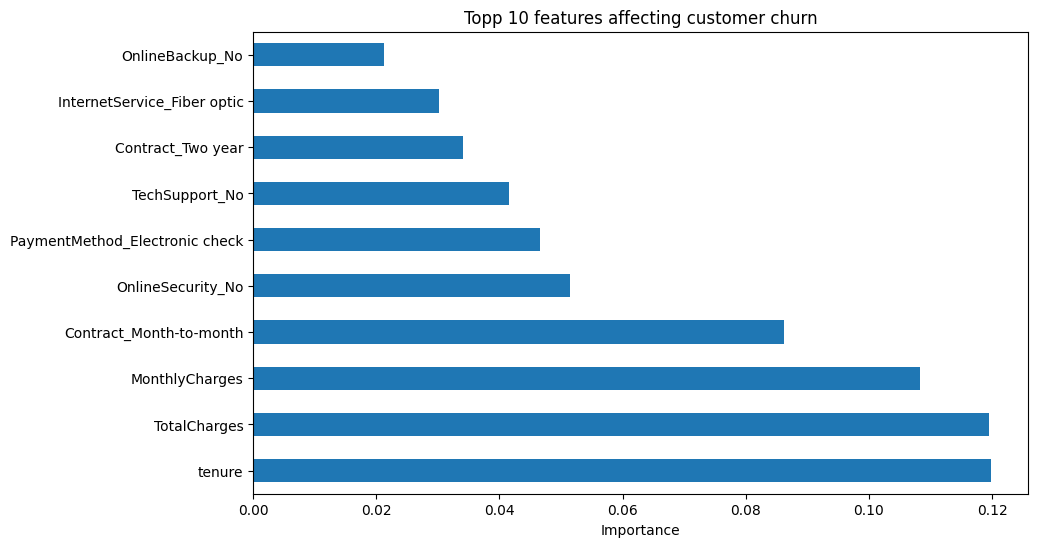

In [30]:
# Take feature importances from the Random Forest model
importances = rf_model.feature_importances_
weights = pd.Series(importances, index=X.columns.values)

# Plot top 10 most important features
plt.figure(figsize=(10,6))
weights.sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('Topp 10 features affecting customer churn')
plt.xlabel('Importance')
plt.show()

## Tuning

In [31]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200], # Number of trees
    'max_depth': [10, 20, None],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10] # Minimum number of samples required to split an internal node
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Set up Grid Search (cv=5 means 5-fold Cross-validation)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall')

# Train (Note: This might take a while)
grid_search.fit(X_train_res, y_train_res)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best Recall score: {grid_search.best_score_}")

# Get the best model to use
best_rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Recall score: 0.8854721549636804


In [ ]:
import joblib

# Save the trained model
joblib.dump(best_rf_model, '../models/churn_prediction_model.pkl')

# Save the scaler
joblib.dump(scaler, '../models/scaler.pkl')


Successfully saved the model and scaler!


In [33]:
model_columns = list(X_train.columns)
joblib.dump(model_columns, '../models/model_columns.pkl')


['../models/model_columns.pkl']